# 🏡 Atelier EDA avec Pandas – Données Airbnb Paris

Dans ce notebook, vous allez explorer les données d'annonces Airbnb à Paris à l'aide de `pandas`. L'objectif est de pratiquer les étapes classiques de l'EDA : lecture, nettoyage, analyse et visualisation.

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

# Configuration des options
pd.set_option('display.max_columns', None)
#sns.set(style='whitegrid')

## Étape 1 : Chargement et première exploration

In [189]:
# Remplace par le chemin vers le fichier listings.csv téléchargé sur Inside Airbnb
file_path = 'listings.csv'
df = pd.read_csv(file_path, parse_dates=True)
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20241206031559,2024-12-07,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, France",NaN,within an hour,100%,67%,f,https://a0.muscache.com/im/users/3631/profile_...,https://a0.muscache.com/im/users/3631/profile_...,Alésia,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,Observatoire,NaN,48.83191,2.31870,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Self check-in"", ""Hangers"", ""Children\u2019s ...",$100.00,2,30,2,2,30,30,2.0,30.0,NaN,t,15,45,75,350,2024-12-07,4,0,0,2017-10-28,2019-10-24,5.00,5.00,5.00,5.00,5.00,5.00,5.00,7511409139079,t,1,1,0,0,0.05
1,5396,https://www.airbnb.com/rooms/5396,20241206031559,2024-12-09,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,Borzou,2009-02-14,"Paris, France",We have spent a lot of time traveling for work...,within an hour,100%,91%,NaN,https://a0.muscache.com/im/users/7903/profile_...,https://a0.muscache.com/im/users/7903/profile_...,Saint-Paul - Ile Saint-Louis,2.0,4.0,"['email', 'phone']",t,t,Neighborhood highlights,Hôtel-de-Ville,NaN,48.85247,2.35835,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Hot water kettle"", ""Hangers"", ""Heating"", ""Co...",$88.00,3,730,1,3,1125,1125,3.0,1125.0,NaN,t,6,24,54,77,2024-12-09,425,51,2,2009-06-30,2024-11-23,4.62,4.64,4.59,4.82,4.85,4.96,4.59,7510402838018,f,1,1,0,0,2.26
2,7397,https://www.airbnb.com/rooms/7397,20241206031559,2024-12-08,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,https://www.airbnb.com/users/show/2626,Franck,2008-08-30,"Paris, France","I am a writer,54, author of novels, books of l...",within an hour,100%,68%,t,https://a0.muscache.com/im/pictures/user/ad6a9...,https://a0.muscache.com/im/pictures/user/ad6a9...,Le Marais,2.0,10.0,"['email', 'phone']",t,t,NaN,Hôtel-de-Ville,NaN,48.85909,2.35315,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,1.0,"[""Hangers"", ""Coffee maker"", ""Heating"", ""Dryer""...",$136.00,10,130,4,10,130,130,9.9,130.0,NaN,t,9,39,62,199,2024-12-08,367,23,2,2011-04-08,2024-11-24,4.73,4.81,4.45,4.92,4.89,4.94,4.74,7510400829623,f,2,2,0,0,2.20
3,7964,https://www.airbnb.com/rooms/7964,20241206031559,2024-12-09,previous scrape,Sunny apartment wit

In [190]:
df.shape  # Dimensions

(91031, 75)

Si le dataset est trop lourd, on peut réduire sa taille avec loc

df = df.loc[:5000,:]

In [191]:
df.dtypes  # Types de données

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [192]:
df.dtypes.value_counts()  # Compte le nombre d'entrées par type de données

object     35
int64      21
float64    19
Name: count, dtype: int64

In [193]:
df.dtypes[df.dtypes == 'int64']

id                                              int64
scrape_id                                       int64
host_id                                         int64
accommodates                                    int64
minimum_nights                                  int64
maximum_nights                                  int64
minimum_minimum_nights                          int64
maximum_minimum_nights                          int64
minimum_maximum_nights                          int64
maximum_maximum_nights                          int64
availability_30                                 int64
availability_60                                 int64
availability_90                                 int64
availability_365                                int64
number_of_reviews                               int64
number_of_reviews_ltm                           int64
number_of_reviews_l30d                          int64
calculated_host_listings_count                  int64
calculated_host_listings_cou

In [194]:
df.describe()  # Statistiques numériques

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.103100e+04,9.103100e+04,9.103100e+04,91022.000000,91022.000000,0.0,91031.000000,91031.000000,91031.000000,60114.000000,83700.000000,59944.000000,91031.000000,9.103100e+04,91031.000000,91031.000000,9.103100e+04,9.103100e+04,91031.000000,9.103100e+04,0.0,91031.000000,91031.000000,91031.000000,91031.000000,91031.000000,91031.000000,91031.000000,67176.000000,67164.000000,67167.000000,67157.000000,67166.000000,67158.000000,67156.000000,91031.000000,91031.000000,91031.000000,91031.000000,67176.000000
mean,6.081553e+17,2.024121e+13,1.818846e+08,30.396596,38.665465,NaN,48.864181,2.343099,3.229274,1.199737,1.337634,1.785984,41.515945,5.978474e+02,40.629401,48.117345,7.139857e+04,7.143443e+04,41.610112,7.141342e+04,NaN,9.387538,21.670046,35.048335,133.604014,22.662719,5.910613,0.422340,4.722760,4.770729,4.656672,4.805165,4.827823,4.818905,4.624605,23.583010,22.522558,0.981808,0.019235,1.065495
std,5.127971e+17,0.000000e+00,2.006094e+08,127.009105,159.747472,NaN,0.018198,0.034228,1.667150,0.541934,0.897769,1.167926,107.573306,3.314542e+04,107.019008,115.617927,1.232800e+07,1.232800e+07,107.091000,1.232800e+07,NaN,10.783952,22.929214,35.695144,135.627545,55.594056,11.745001,1.160089,0.403397,0.381384,0.455675,0.372354,0.361166,0.311784,0.441887,94.650167,93.227797,10.927202,0.335941,1.353293
min,3.109000e+03,2.024121e+13,2.626000e+03,0.000000,0.000000,NaN,48.816090,2.227420,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.233102e+07,2.024121e+13,1.956359e+07,1.000000,1.000000,NaN,48.850740,2.321011,2.000000,1.000000,1.000000,1.000000,2.000000,4.500000e+01,1.000000,2.000000,4.000000e+01,6.000000e+01,2.000000,6.000000e+01,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.620000,4.700000,4.500000,4.770000,4.800000,4.760000,4.500000,1.000000,1.000000,0.000000,0.000000,0.210000
50%,8.113895e+17,2.024121e+13,7.262684e+07,1.000000,2.000000,NaN,48.865470,2.346829,3.000000,1.000000,1.000000,1.000000,3.000000,3.650000e+02,3.000000,3.000000,3.650000e+02,3.650000e+02,3.000000,3.650000e+02,NaN,5.000000,12.000000,21.000000,88.000000,5.000000,1.000000,0.000000,4.830000,4.880000,4.790000,4.920000,4.950000,4.920000,4.720000,1.000000,1.000000,0.000000,0.000000,0.590000
75%,1.092549e+18,2.024121e+13,3.394154e+08,3.000000,5.000000,NaN,48.879055,2.368320,4.000000,1.000000,2.000000,2.000000,5.000000,1.125000e+03,5.000000,6.000000,1.125000e+03,1.125000e+03,6.000000,1.125000e+03,NaN,18.000000,44.000000,72.000000,267.000000,22.000000,7.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,2.000000,2.000000,0.000000,0.000000,1.420000
max,1.305100e+18,2.024121e+13,6.654112e+08,7663.000000,8018.000000,NaN,48.901510,2.467120,16.000000,42.000000,41.000000,17.000000,1000.000000,1.000000e+07,1000.000000,1000.000000,2.147484e+09,2.147484e+09,1000.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,3436.000000,780.000000,61.000000,5.000000,5.000000,5.000000,5.00

In [195]:
df.columns  # Liste des colonnes

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

##  Étape 2 : Nettoyage des données

In [196]:
df.isna().sum()  # Compte les valeurs manquantes par colonne

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                      3491
neighborhood_overview                           45135
picture_url                                         1
host_id                                             0
host_url                                            0
host_name                                           9
host_since                                          9
host_location                                   18263
host_about                                      51453
host_response_time                              38821
host_response_rate                              38821
host_acceptance_rate                            29938
host_is_superhost           

In [197]:
# Détection des valeurs manquantes
df.isna().sum().sort_values(ascending=False)

neighbourhood_group_cleansed                    91031
calendar_updated                                91031
host_neighbourhood                              58862
host_about                                      51453
neighborhood_overview                           45135
neighbourhood                                   45135
host_response_rate                              38821
host_response_time                              38821
beds                                            31087
price                                           30938
bathrooms                                       30917
host_acceptance_rate                            29938
review_scores_value                             23875
review_scores_checkin                           23874
review_scores_location                          23873
review_scores_accuracy                          23867
review_scores_communication                     23865
review_scores_cleanliness                       23864
first_review                

In [198]:
df.shape[0]

91031

In [199]:
df.isna().sum().sort_values(ascending=False)/ df.shape[0]

neighbourhood_group_cleansed                    1.000000
calendar_updated                                1.000000
host_neighbourhood                              0.646615
host_about                                      0.565225
neighborhood_overview                           0.495820
neighbourhood                                   0.495820
host_response_rate                              0.426459
host_response_time                              0.426459
beds                                            0.341499
price                                           0.339862
bathrooms                                       0.339632
host_acceptance_rate                            0.328877
review_scores_value                             0.262273
review_scores_checkin                           0.262262
review_scores_location                          0.262251
review_scores_accuracy                          0.262185
review_scores_communication                     0.262163
review_scores_cleanliness      

In [200]:
pd.set_option('display.max_rows', 100)

In [201]:
df.isna().sum().sort_values(ascending=False)/ df.shape[0]

neighbourhood_group_cleansed                    1.000000
calendar_updated                                1.000000
host_neighbourhood                              0.646615
host_about                                      0.565225
neighborhood_overview                           0.495820
neighbourhood                                   0.495820
host_response_rate                              0.426459
host_response_time                              0.426459
beds                                            0.341499
price                                           0.339862
bathrooms                                       0.339632
host_acceptance_rate                            0.328877
review_scores_value                             0.262273
review_scores_checkin                           0.262262
review_scores_location                          0.262251
review_scores_accuracy                          0.262185
review_scores_communication                     0.262163
review_scores_cleanliness      

In [202]:
df.columns[df.isna().sum().sort_values(ascending=False)/ df.shape[0] < 0.4]

Index(['picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availa

In [203]:
df = df[df.columns[df.isna().sum().sort_values(ascending=False)/ df.shape[0] < 0.4]]

In [204]:
df.shape

(91031, 67)

In [205]:
df.columns.str.contains('url')

array([ True, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [206]:
df.columns[df.columns.str.contains('url')]

Index(['picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url'], dtype='object')

Utilisation du tilde ~ pour inverser un filtre 

In [207]:
df.columns[~ df.columns.str.contains('url')]

Index(['host_id', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_review

In [208]:
df = df[df.columns[~ df.columns.str.contains('url')]]

In [209]:
df.shape

(91031, 63)

In [210]:
df.columns  # Noms des colonnes

Index(['host_id', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_review

In [211]:
drop_col = [col for col in df.columns if any(mot in col for mot in ['host', 'maximum', 'minimum', 'availability'])]
[col for col in df.columns if any(mot in col for mot in ['host', 'maximum', 'minimum', 'availability'])]

['host_id',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms']

In [212]:
df.drop(columns=drop_col, inplace=True)

In [213]:
df.shape

(91031, 31)

In [214]:
df.columns  # Noms des colonnes

Index(['neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'calendar_updated', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [215]:
df['last_review'].dtypes

dtype('O')

In [216]:
# Exemple : Conversion en date si applicable
df['last_review'] = pd.to_datetime(df['last_review'])

In [217]:
df['last_review'].dtypes

dtype('<M8[ns]')

In [218]:
df['last_review'].head(10)

0   2019-10-24
1   2024-11-23
2   2024-11-24
3   2015-09-14
4          NaT
5   2024-09-24
6   2024-10-01
7   2024-09-27
8   2023-10-21
9   2010-05-28
Name: last_review, dtype: datetime64[ns]

In [219]:
df['last_review']

0       2019-10-24
1       2024-11-23
2       2024-11-24
3       2015-09-14
4              NaT
           ...    
91026          NaT
91027          NaT
91028          NaT
91029          NaT
91030          NaT
Name: last_review, Length: 91031, dtype: datetime64[ns]

##  Étape 3 : Analyse descriptive

In [220]:
df['room_type'].value_counts()

room_type
Entire home/apt    81068
Private room        8850
Hotel room           732
Shared room          381
Name: count, dtype: int64

In [221]:
df['price'].head(10)

0    $100.00
1     $88.00
2    $136.00
3        NaN
4     $75.00
5    $150.00
6        NaN
7     $80.00
8    $120.00
9        NaN
Name: price, dtype: object

In [222]:
df['price'].str.split('$', expand=True)

,0,1
0,,100.00
1,,88.00
2,,136.00
3,NaN,NaN
4,,75.00
...,...,...
91026,,100.00
91027,,80.00
91028,,818.00
91029,,840.00


In [223]:
df['price'].str.replace('[$,]', '', regex=True).astype(float)

0        100.0
1         88.0
2        136.0
3          NaN
4         75.0
         ...  
91026    100.0
91027     80.0
91028    818.0
91029    840.0
91030     66.0
Name: price, Length: 91031, dtype: float64

In [224]:
df['price'] = df['price'].str.replace('[$,]', '', regex=True).astype(float)

In [225]:
df.groupby('room_type')['price'].mean()

room_type
Entire home/apt    259.783621
Hotel room         306.933213
Private room       179.769480
Shared room         94.336207
Name: price, dtype: float64

<Axes: xlabel='room_type'>

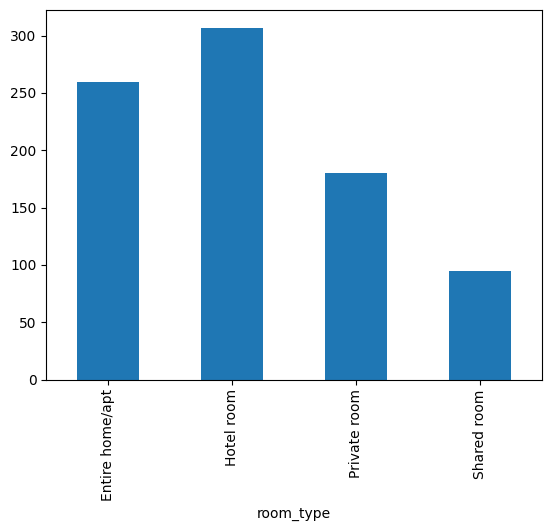

In [226]:
# Prix moyen par type de logement
df.groupby('room_type')['price'].mean().plot(kind='bar')

Quels sont les 10 quartiers avec le plus grand nombre d’annonces ?

In [227]:
# Sélection des colonnes contenant 'neighbourhood'
neigh_cols = df.columns[df.columns.str.contains('neighbourhood')]

df[neigh_cols].isna().sum()

neighbourhood                   45135
neighbourhood_cleansed              0
neighbourhood_group_cleansed    91031
dtype: int64

In [228]:
df[neigh_cols].nunique()

neighbourhood                    1
neighbourhood_cleansed          20
neighbourhood_group_cleansed     0
dtype: int64

<Axes: xlabel='neighbourhood_cleansed'>

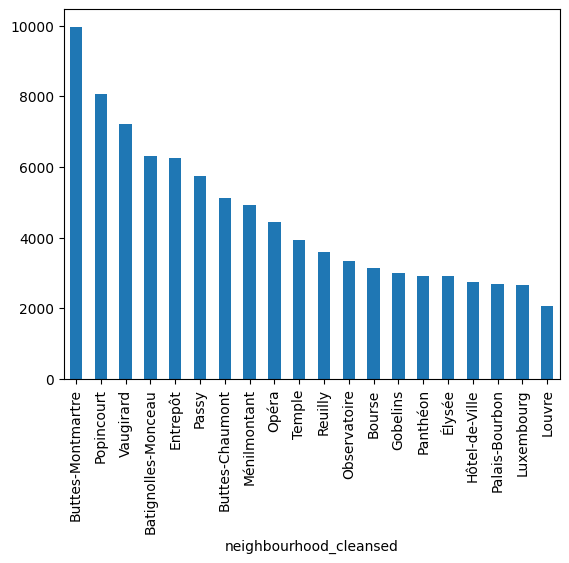

In [229]:
# Nombre d’annonces par quartier
df['neighbourhood_cleansed'].value_counts().plot(kind='bar')

Calcule le prix moyen et médian par quartier (`neighbourhood`)

<Axes: xlabel='neighbourhood_cleansed'>

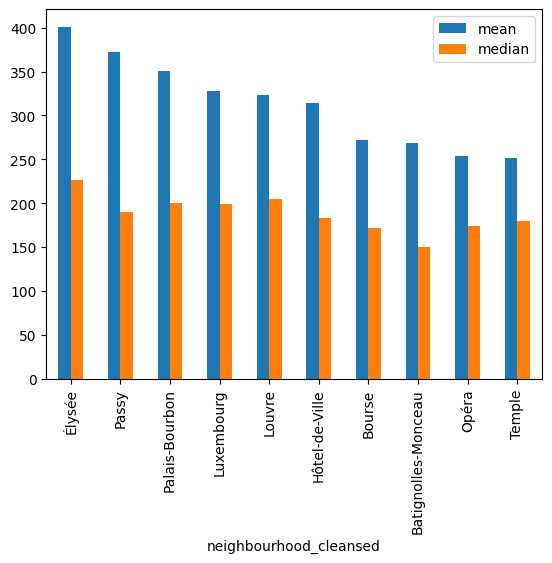

In [230]:
(df.groupby('neighbourhood_cleansed')['price']
    .agg(['mean', 'median'])
    .sort_values(by='mean', ascending=False)
    .head(10)
    .plot(kind='bar')
) 

<Axes: ylabel='Frequency'>

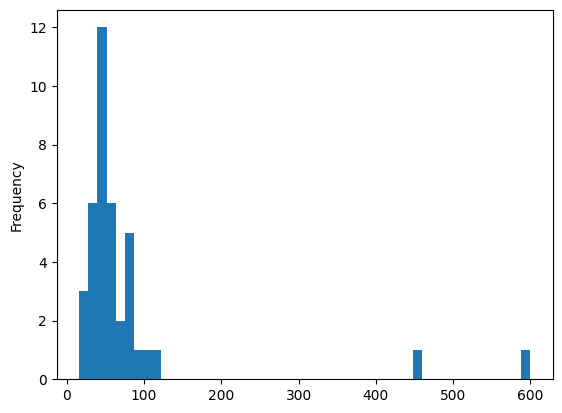

In [231]:
# Créer la colonne 'price_per_person' uniquement si 'accommodates' > 0
df['price_per_person'] = df.apply(
    lambda row: row['price'] / row['accommodates'] if pd.notnull(row['accommodates']) and row['accommodates'] > 0 else None,
    axis=1
)

df['price_per_person'].head(50).plot(kind='hist', bins=50)

##  Étape 4 : Visualisation simple

Text(0, 0.5, 'Nombre dannonces')

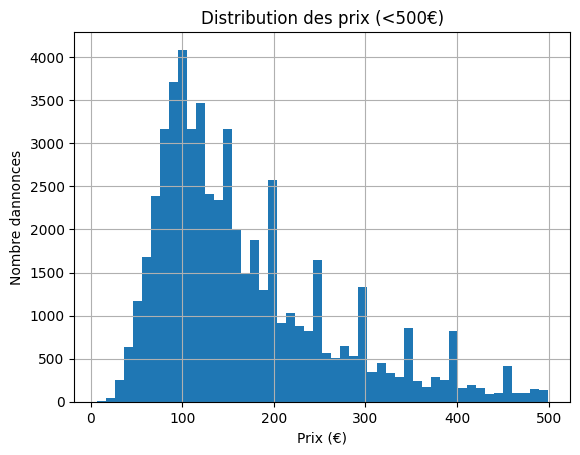

In [232]:
# Histogramme des prix (cap à 500€ pour lisibilité)
df[df['price'] < 500]['price'].hist(bins=50)
plt.title('Distribution des prix (<500€)')
plt.xlabel('Prix (€)')
plt.ylabel('Nombre dannonces')

Text(0.5, 1.0, 'Répartition des types de logements')

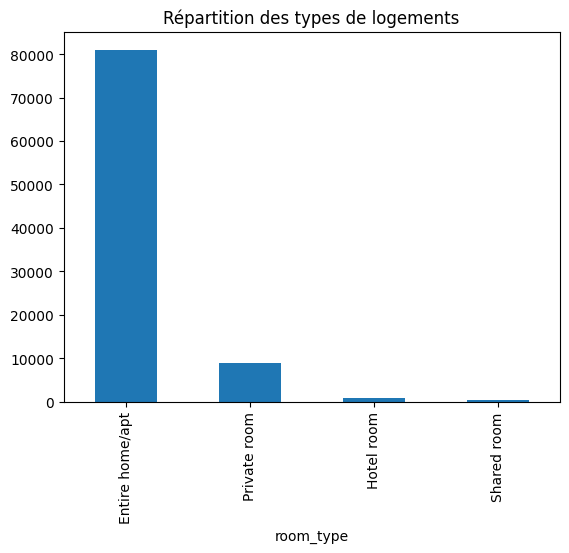

In [233]:
# Barplot du nombre d'annonces par type de logement
df['room_type'].value_counts().plot(kind='bar')
plt.title('Répartition des types de logements')

##  Étape 5 : Synthèse

In [234]:
# Quartiers avec le prix moyen le plus élevé
df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(5)

neighbourhood
Neighborhood highlights    260.260556
Name: price, dtype: float64

##  Étape 6 : Mini-défi final (autonomie)

1. Quels sont les 5 hôtes qui ont le plus grand nombre d’annonces ?
2. Quel est le prix moyen par nuit pour les logements entiers ?
3. Quelle est la relation entre nombre de commentaires et prix ?
4. Quelle est la note moyenne par quartier (si la colonne existe) ?

Pour cela il faut recharger le dataset car nous avons supprimé des colonnes

In [235]:
df = pd.read_csv(file_path, parse_dates=True)

In [236]:
top_hosts = df['host_id'].value_counts().head(5)
print("Top 5 hôtes avec le plus d’annonces :")
print(top_hosts)

Top 5 hôtes avec le plus d’annonces :
host_id
314994947    826
33889201     498
50978178     344
460047164    326
26981054     244
Name: count, dtype: int64


In [237]:
# Pour avoir leur nom
top_hosts_df = (
    df.groupby(['host_id', 'host_name'])
        .size()
        .reset_index(name='annonce_count')
        .sort_values(by='annonce_count', ascending=False)
        .head(5)
)
print(top_hosts_df)

         host_id                host_name  annonce_count
52856  314994947               Blueground            826
26090   33889201                    Veeve            498
32401   50978178                Sébastien            344
57615  460047164               FlexLiving            326
22612   26981054  Cédric De ClickYourFlat            244


Quel est le prix moyen par nuit pour les logements entiers ?

In [238]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

prix_moyen_entiers = df[df['room_type'] == 'Entire home/apt']['price'].mean()
print(f"Prix moyen par nuit pour les logements entiers : ${prix_moyen_entiers:.2f}")

Prix moyen par nuit pour les logements entiers : $259.78


Quelle est la relation entre nombre de commentaires et prix ?

In [239]:
df[['number_of_reviews', 'price']]

,number_of_reviews,price
0,4,100.0
1,425,88.0
2,367,136.0
3,5,NaN
4,0,75.0
...,...,...
91026,0,100.0
91027,0,80.0
91028,0,818.0
91029,0,840.0


On donne directement les données à matplotlib

Text(0, 0.5, 'Prix')

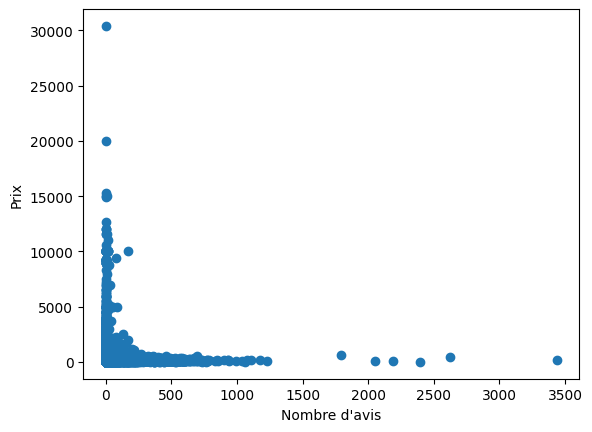

In [240]:
plt.scatter(df['number_of_reviews'], df['price'])
plt.xlabel('Nombre d\'avis')
plt.ylabel('Prix')

In [241]:
# on peut aussi calculer la corrélation
correlation = df[['number_of_reviews', 'price']].corr().iloc[0, 1]
print(f"Corrélation entre nombre de commentaires et prix : {correlation:.2f}")

Corrélation entre nombre de commentaires et prix : -0.05


In [242]:
correlation

np.float64(-0.05297096273069312)

Quelle est la note moyenne par quartier (si la colonne existe) ?

In [243]:
note_moyenne = df.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().sort_values(ascending=False)
print("Note moyenne par quartier :")
print(note_moyenne.head(10))

Note moyenne par quartier :
neighbourhood_cleansed
Ménilmontant         4.761031
Buttes-Chaumont      4.751502
Popincourt           4.743938
Buttes-Montmartre    4.741841
Entrepôt             4.734747
Palais-Bourbon       4.731723
Opéra                4.726306
Gobelins             4.723902
Panthéon             4.722702
Hôtel-de-Ville       4.721138
Name: review_scores_rating, dtype: float64
